In [169]:
import pandas as pd #Utilizado para manipular dataframes sobre ingressantes 2022 2021
import matplotlib.pyplot as plt #Utilizado para gerar gráficos

In [170]:
%run ./Funcoes.ipynb

DataFrames:

In [171]:
df22 = pd.read_csv('discentes-2022-ufpe.csv') 
df21 = pd.read_csv('discentes-ingressos-cursos-graduacao-2021-ufpe.csv')

#Junção dos dataframes 2021 e 2022 em um só
dfall = df21.append(df22, ignore_index=True)

#Malha geográfica de Pernambuco
dfpe = gpd.read_file('DadosGeograficos/PE_Municipios_2021.shp') 

#Malha geográfica de Recife
dfrecife = gpd.read_file('http://dados.recife.pe.gov.br/dataset/c1f100f0-f56f-4dd4-9dcc-1aa4da28798a/resource/e43bee60-9448-4d3d-92ff-2378bc3b5b00/download/bairros.geojson')


Alunos por Cidade:

In [172]:
#Ajusta geodataframe com relação entre quantidade de alunos de cada cidade
#Gera string contendo relação entre numero e cidade
map_and_stats_pe=dfCidades(dfall, dfpe)
relacao = [f"{map_and_stats_pe['Indice'][x]}: {map_and_stats_pe['NM_MUN'][x]}" for x in map_and_stats_pe['Indice']]
relacao = ajusteTabela(relacao)

(-41.26665672144995,
 -34.49907329554999,
 -9.593394625949912,
 -7.162456601049958)

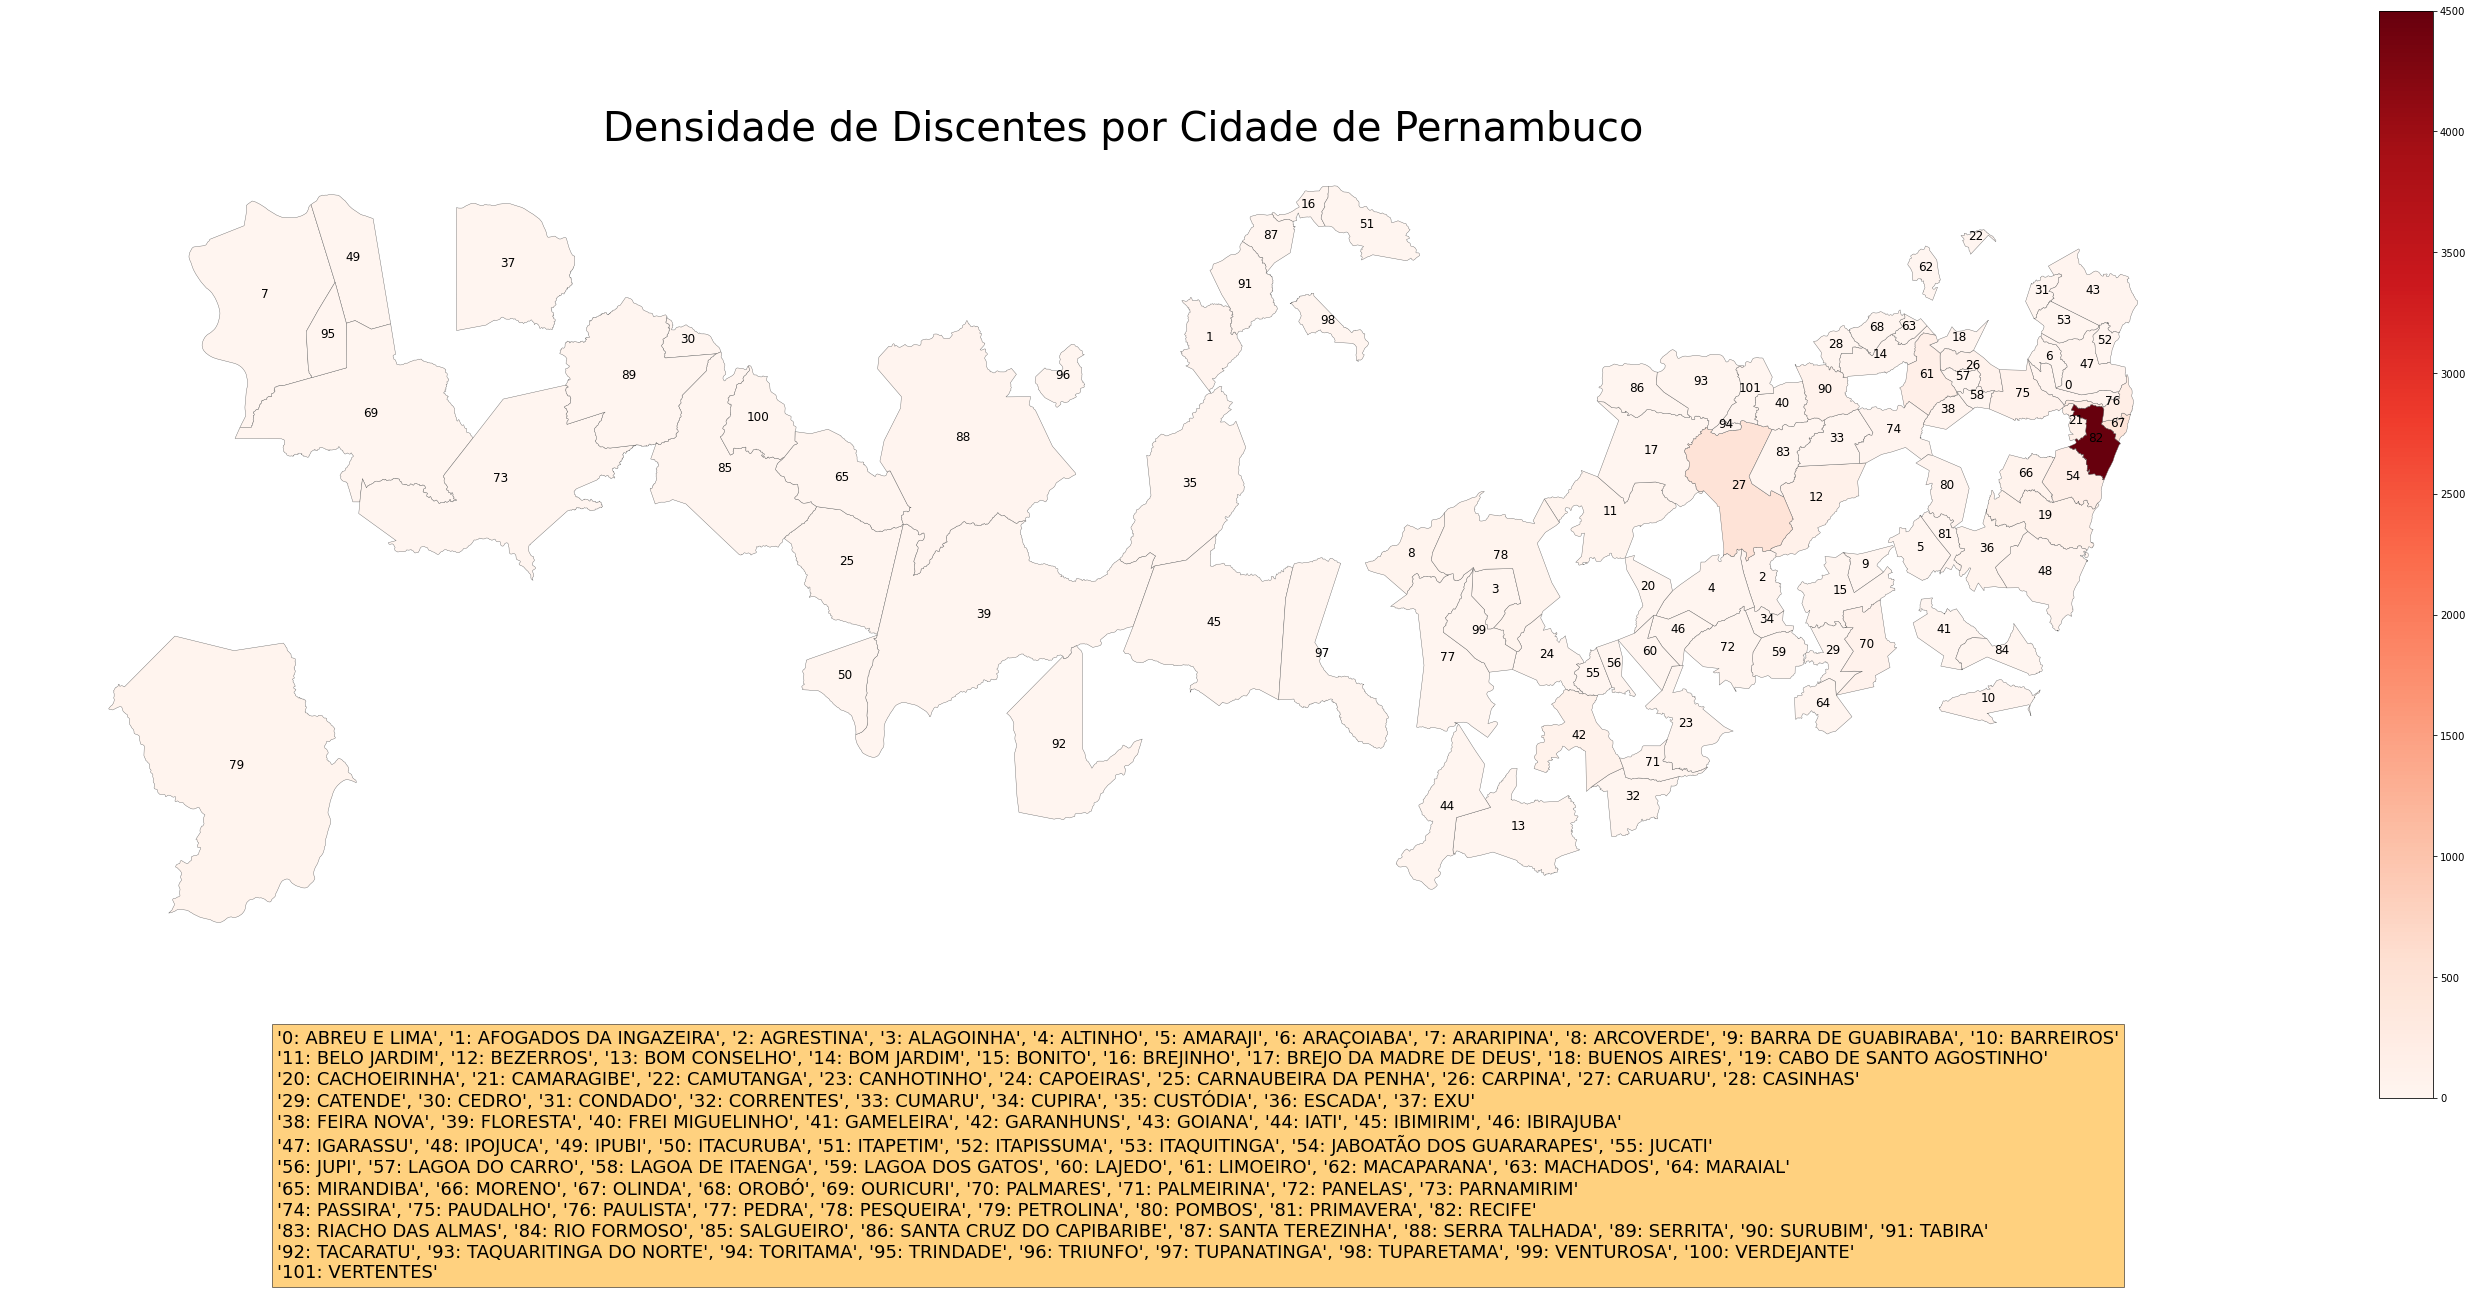

In [173]:
fig, ax = plt.subplots(1, figsize=(50, 20))
plt.xticks(rotation=90)
plt.title(label = "Densidade de Discentes por Cidade de Pernambuco",fontsize=40)
plt.figtext(0.2, 0, relacao, ha="left", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
map_and_stats_pe.plot(column="Alunos", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
map_and_stats_pe.apply(lambda x: ax.annotate(text=x['Indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=12), axis=1,)
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=4500))
bar_info._A = []
cbar = fig.colorbar(bar_info)
ax.axis("off")

Alunos por Bairro:

In [174]:
#Ajusta geodataframe com relação entre quantidade de alunos de cada bairro de recife
#Gera string contendo relação entre numero e bairro
map_and_stats_rec = dfBairros(dfall, dfrecife)
relacao = [f"{map_and_stats_rec['Indice'][x]}: {map_and_stats_rec['bairro_nome_ca'][x]}" for x in map_and_stats_rec['Indice']]
relacao = ajusteTabela(relacao)

(-35.02656241739515,
 -34.849511611585676,
 -8.166782392960442,
 -7.915054767400497)

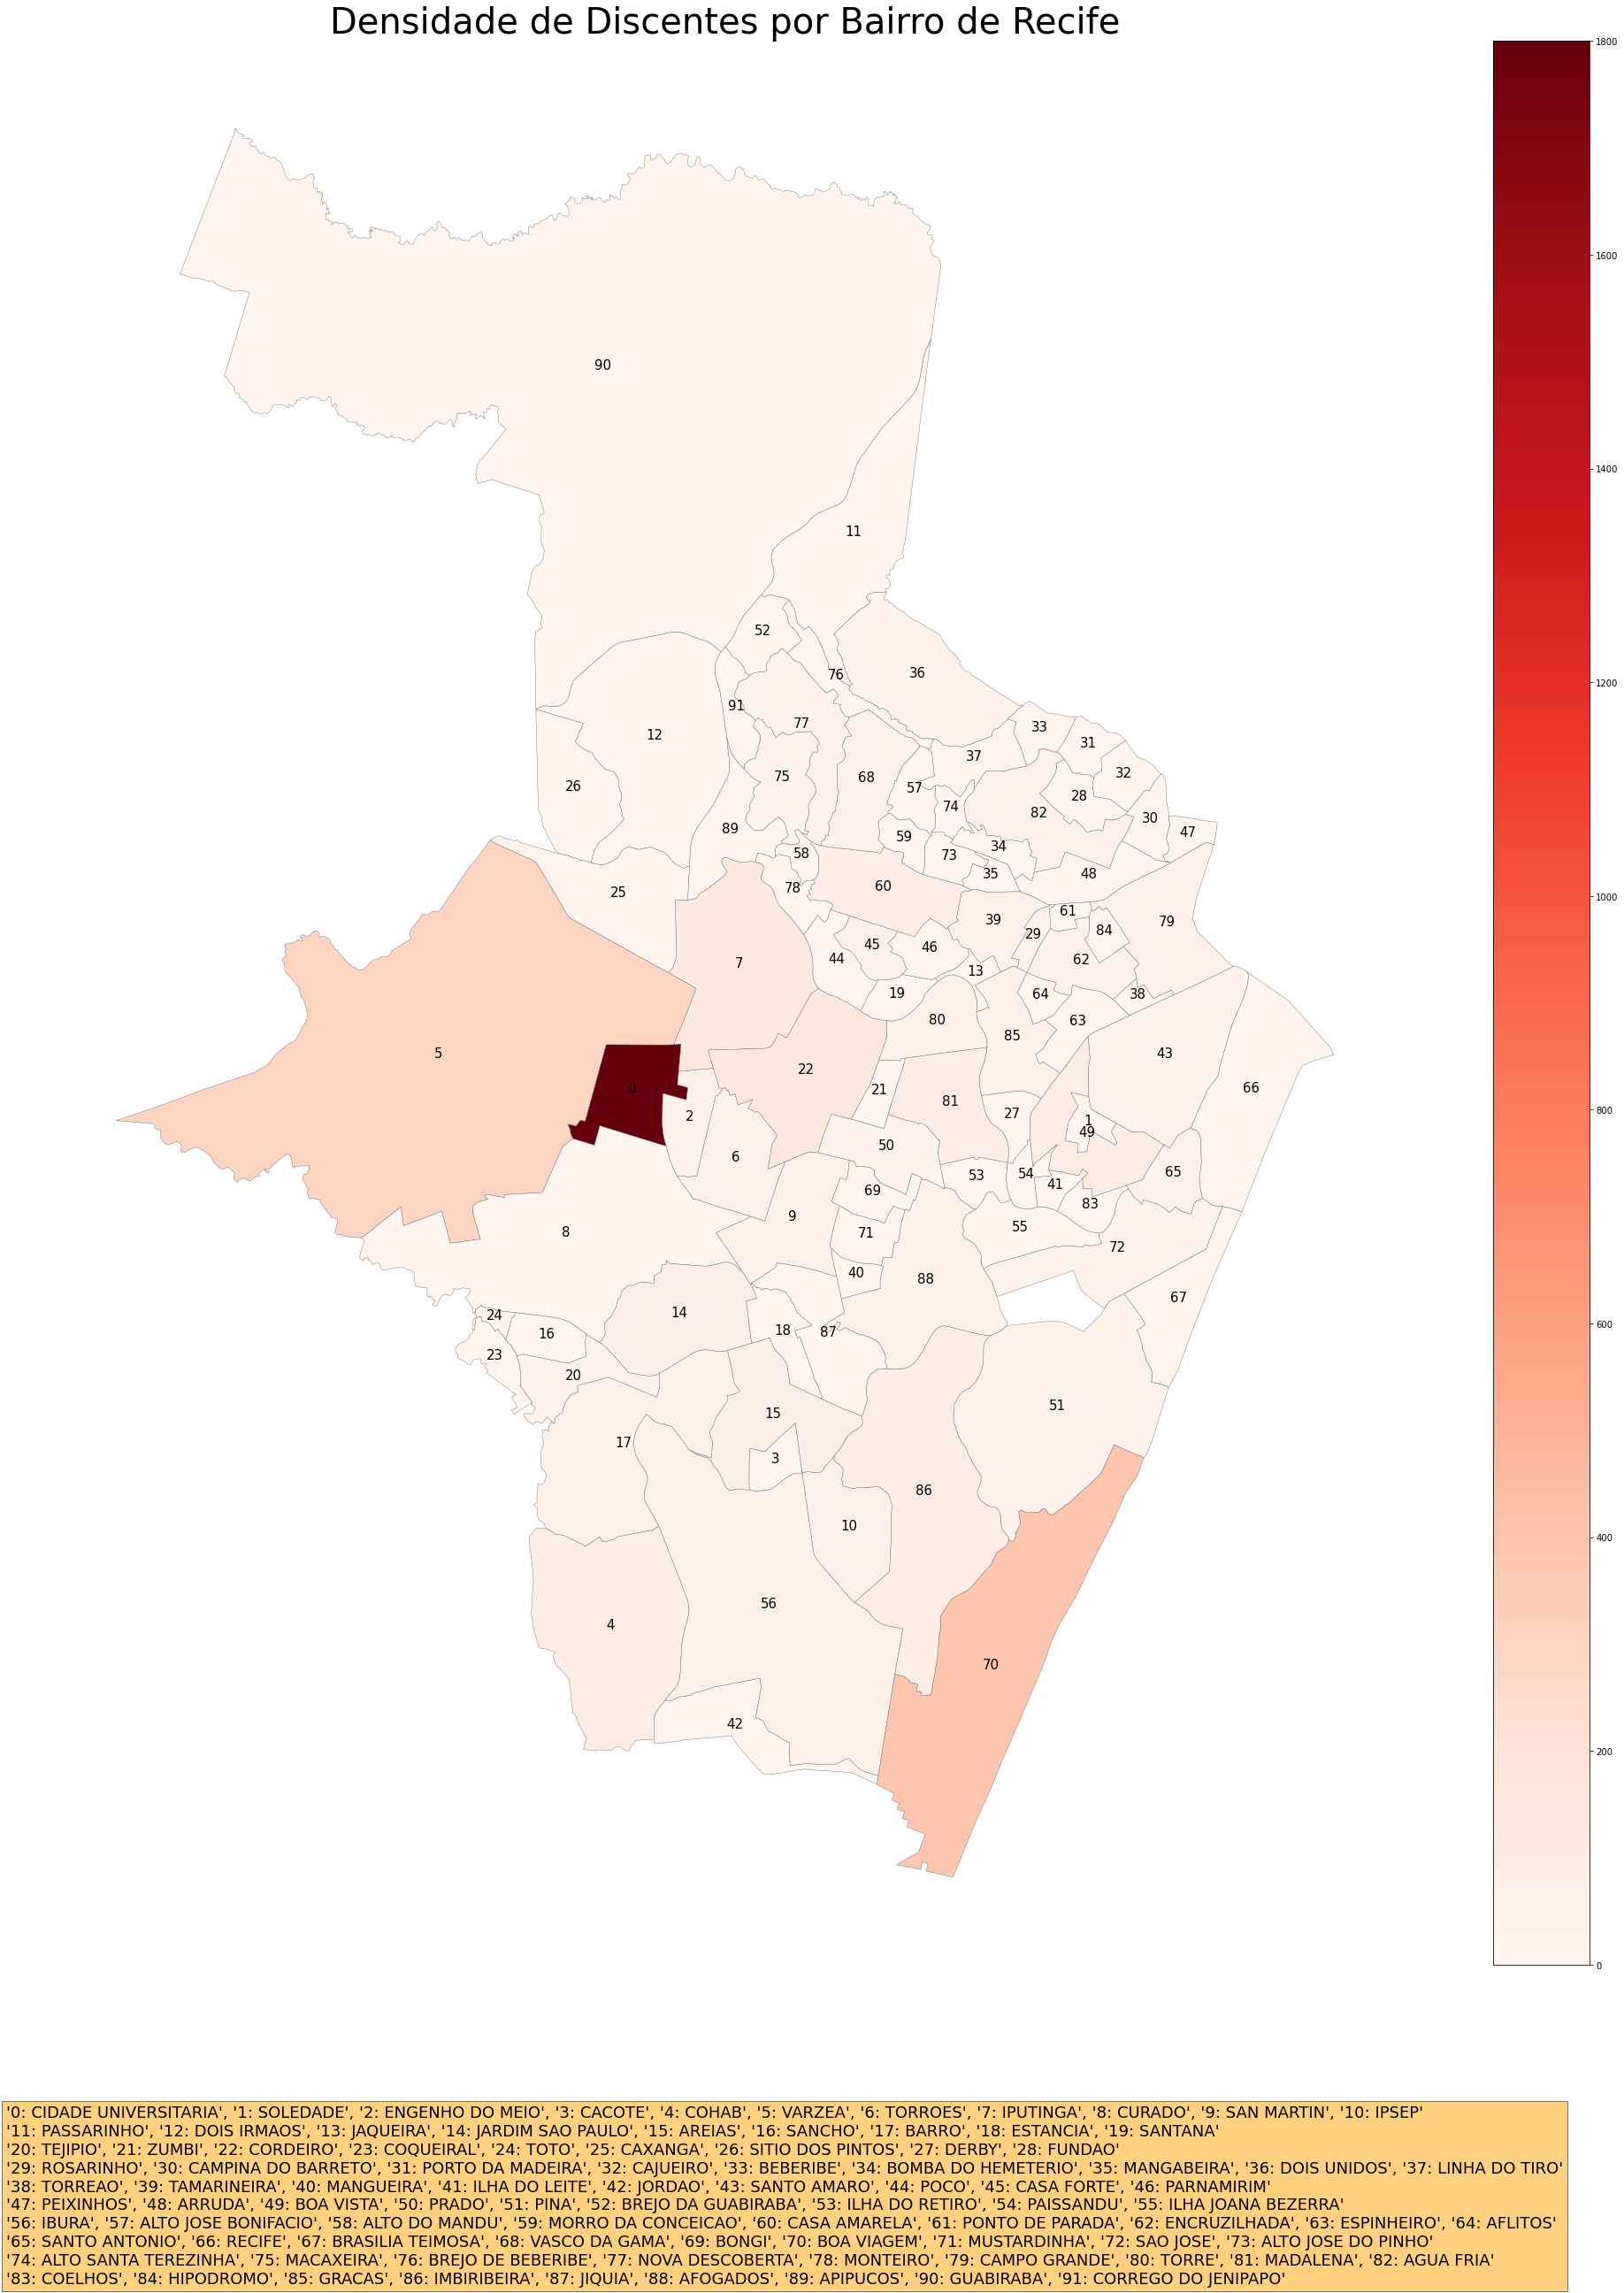

In [175]:
fig1, ax1 = plt.subplots(1, figsize=(40, 40))
plt.xticks(rotation=90)
plt.title(label = "Densidade de Discentes por Bairro de Recife",fontsize=40)
plt.figtext(0.2, 0, relacao, ha="left", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
map_and_stats_rec.plot(column="Alunos", cmap="Reds", linewidth=0.4, ax=ax1, edgecolor=".4")
map_and_stats_rec.apply(lambda x: ax1.annotate(text=x['Indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=15), axis=1,)
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=1800))
bar_info._A = []
cbar = fig1.colorbar(bar_info)
ax1.axis("off")



(-35.02656241739515,
 -34.849511611585676,
 -8.166782392960442,
 -7.915054767400497)

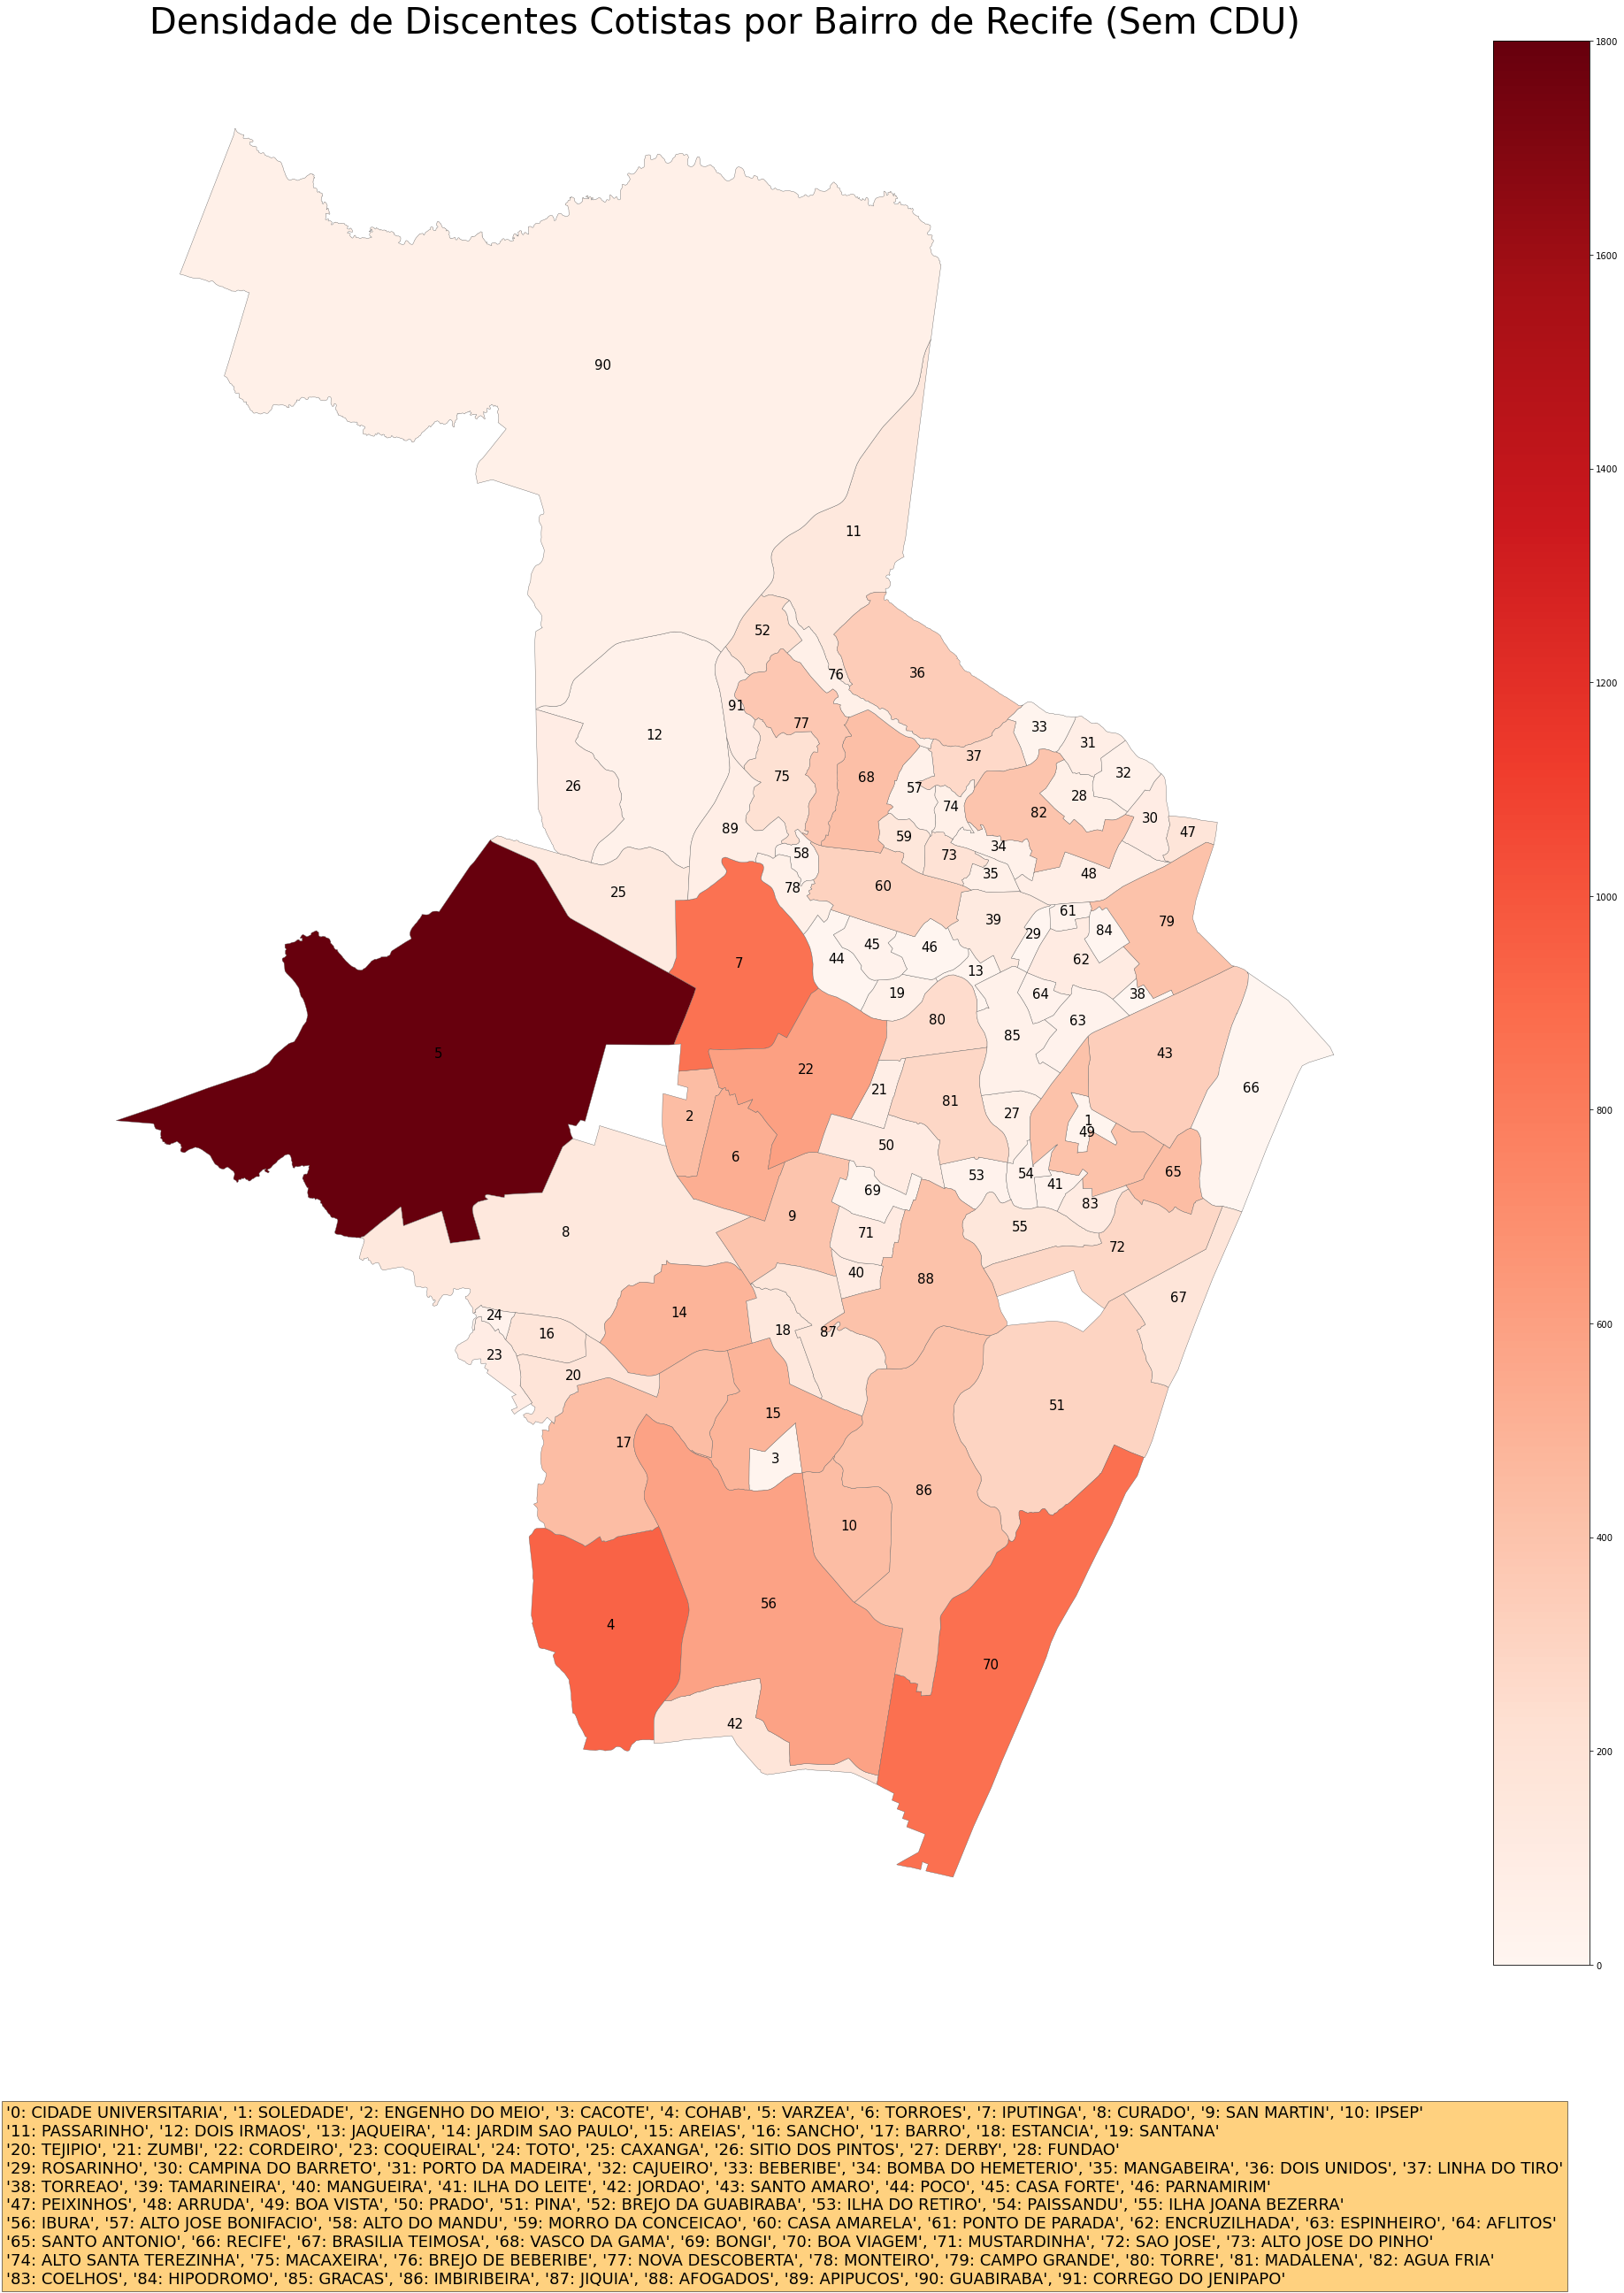

In [176]:
fig2, ax2 = plt.subplots(1, figsize=(40, 40))
plt.xticks(rotation=90)
plt.title(label = "Densidade de Discentes Cotistas por Bairro de Recife (Sem CDU)",fontsize=40)
plt.figtext(0.2, 0, relacao, ha="left", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
map_and_stats_rec[map_and_stats_rec["bairro_nome_ca"] != "CIDADE UNIVERSITARIA"].plot(column="cotistas", cmap="Reds", linewidth=0.4, ax=ax2, edgecolor=".4")
map_and_stats_rec[map_and_stats_rec["bairro_nome_ca"] != "CIDADE UNIVERSITARIA"].apply(lambda x: ax2.annotate(text=x['Indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=15), axis=1,)
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=1800))
bar_info._A = []
cbar = fig2.colorbar(bar_info)
ax2.axis("off")

(-35.02656241739515,
 -34.849511611585676,
 -8.166782392960442,
 -7.915054767400497)

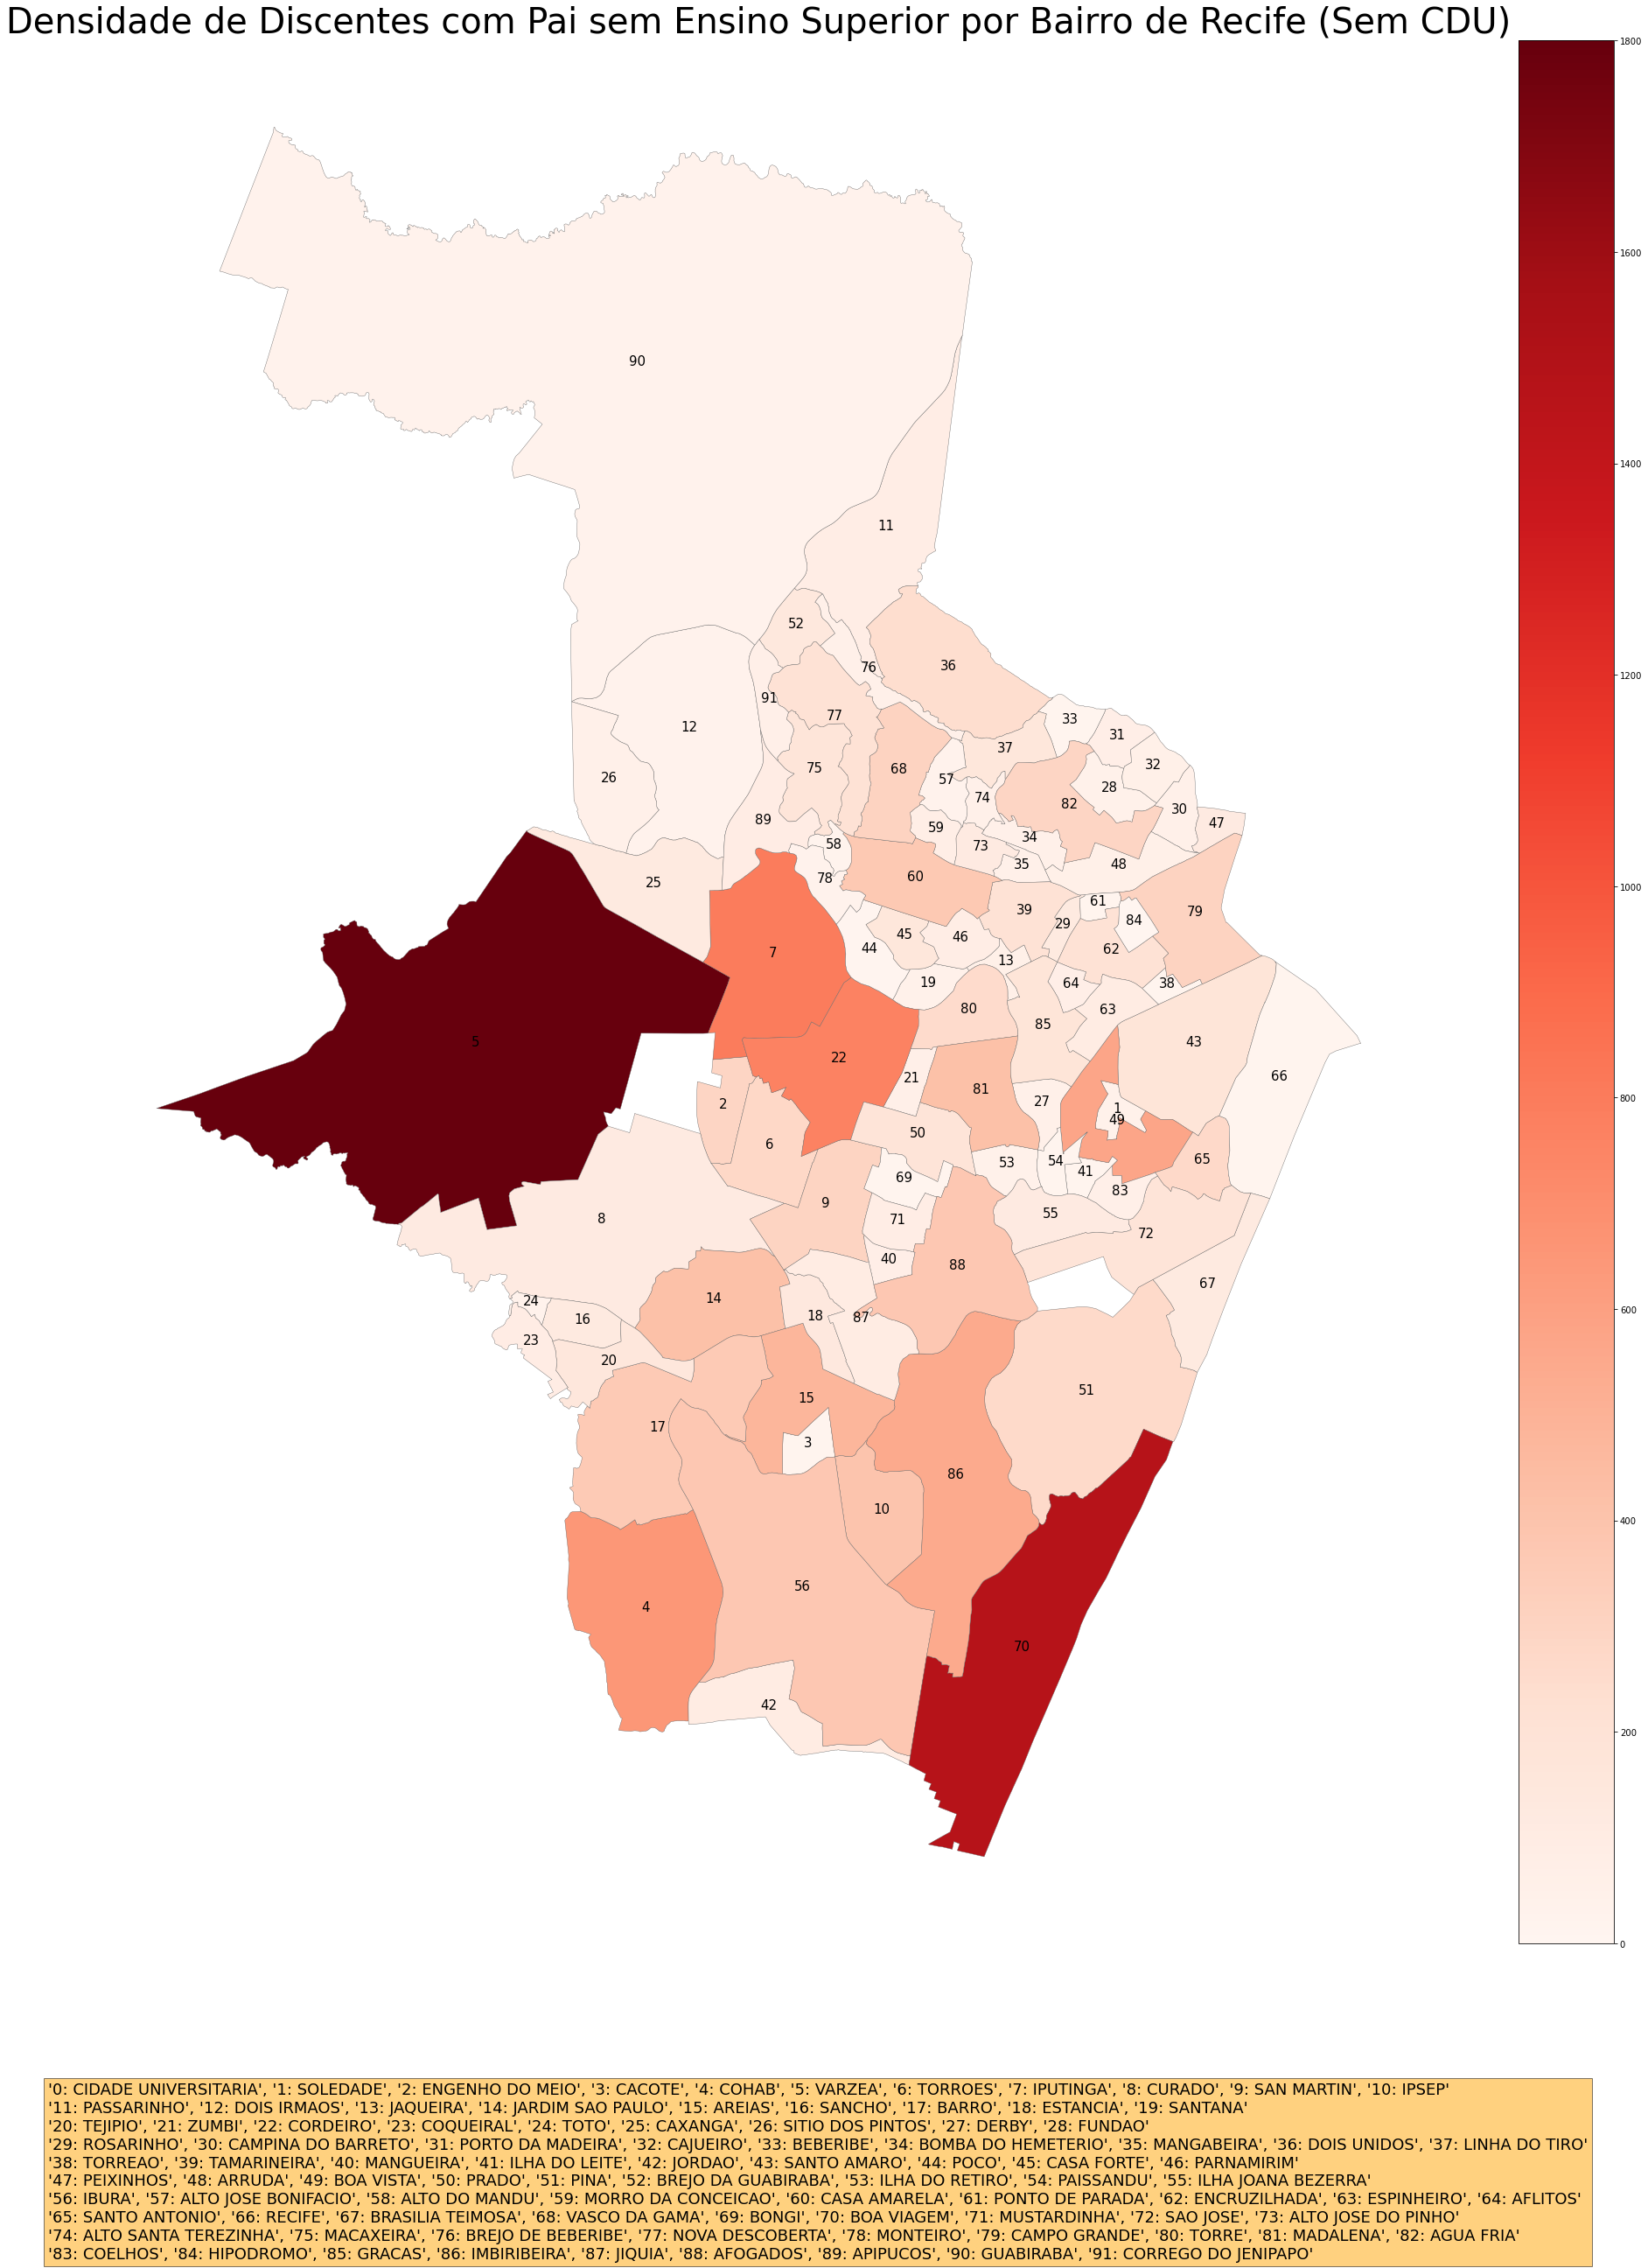

In [177]:
fig2a, ax2a = plt.subplots(1, figsize=(40, 40))
plt.xticks(rotation=90)
plt.title(label = "Densidade de Discentes com Pai sem Ensino Superior por Bairro de Recife (Sem CDU)",fontsize=40)
plt.figtext(0.2, 0, relacao, ha="left", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
map_and_stats_rec[map_and_stats_rec["bairro_nome_ca"] != "CIDADE UNIVERSITARIA"].plot(column="pai_escolaridade", cmap="Reds", linewidth=0.4, ax=ax2a, edgecolor=".4")
map_and_stats_rec[map_and_stats_rec["bairro_nome_ca"] != "CIDADE UNIVERSITARIA"].apply(lambda x: ax2a.annotate(text=x['Indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=15), axis=1,)
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=1800))
bar_info._A = []
cbar = fig2a.colorbar(bar_info)
ax2a.axis("off")

(-35.02656241739515,
 -34.849511611585676,
 -8.166782392960442,
 -7.915054767400497)

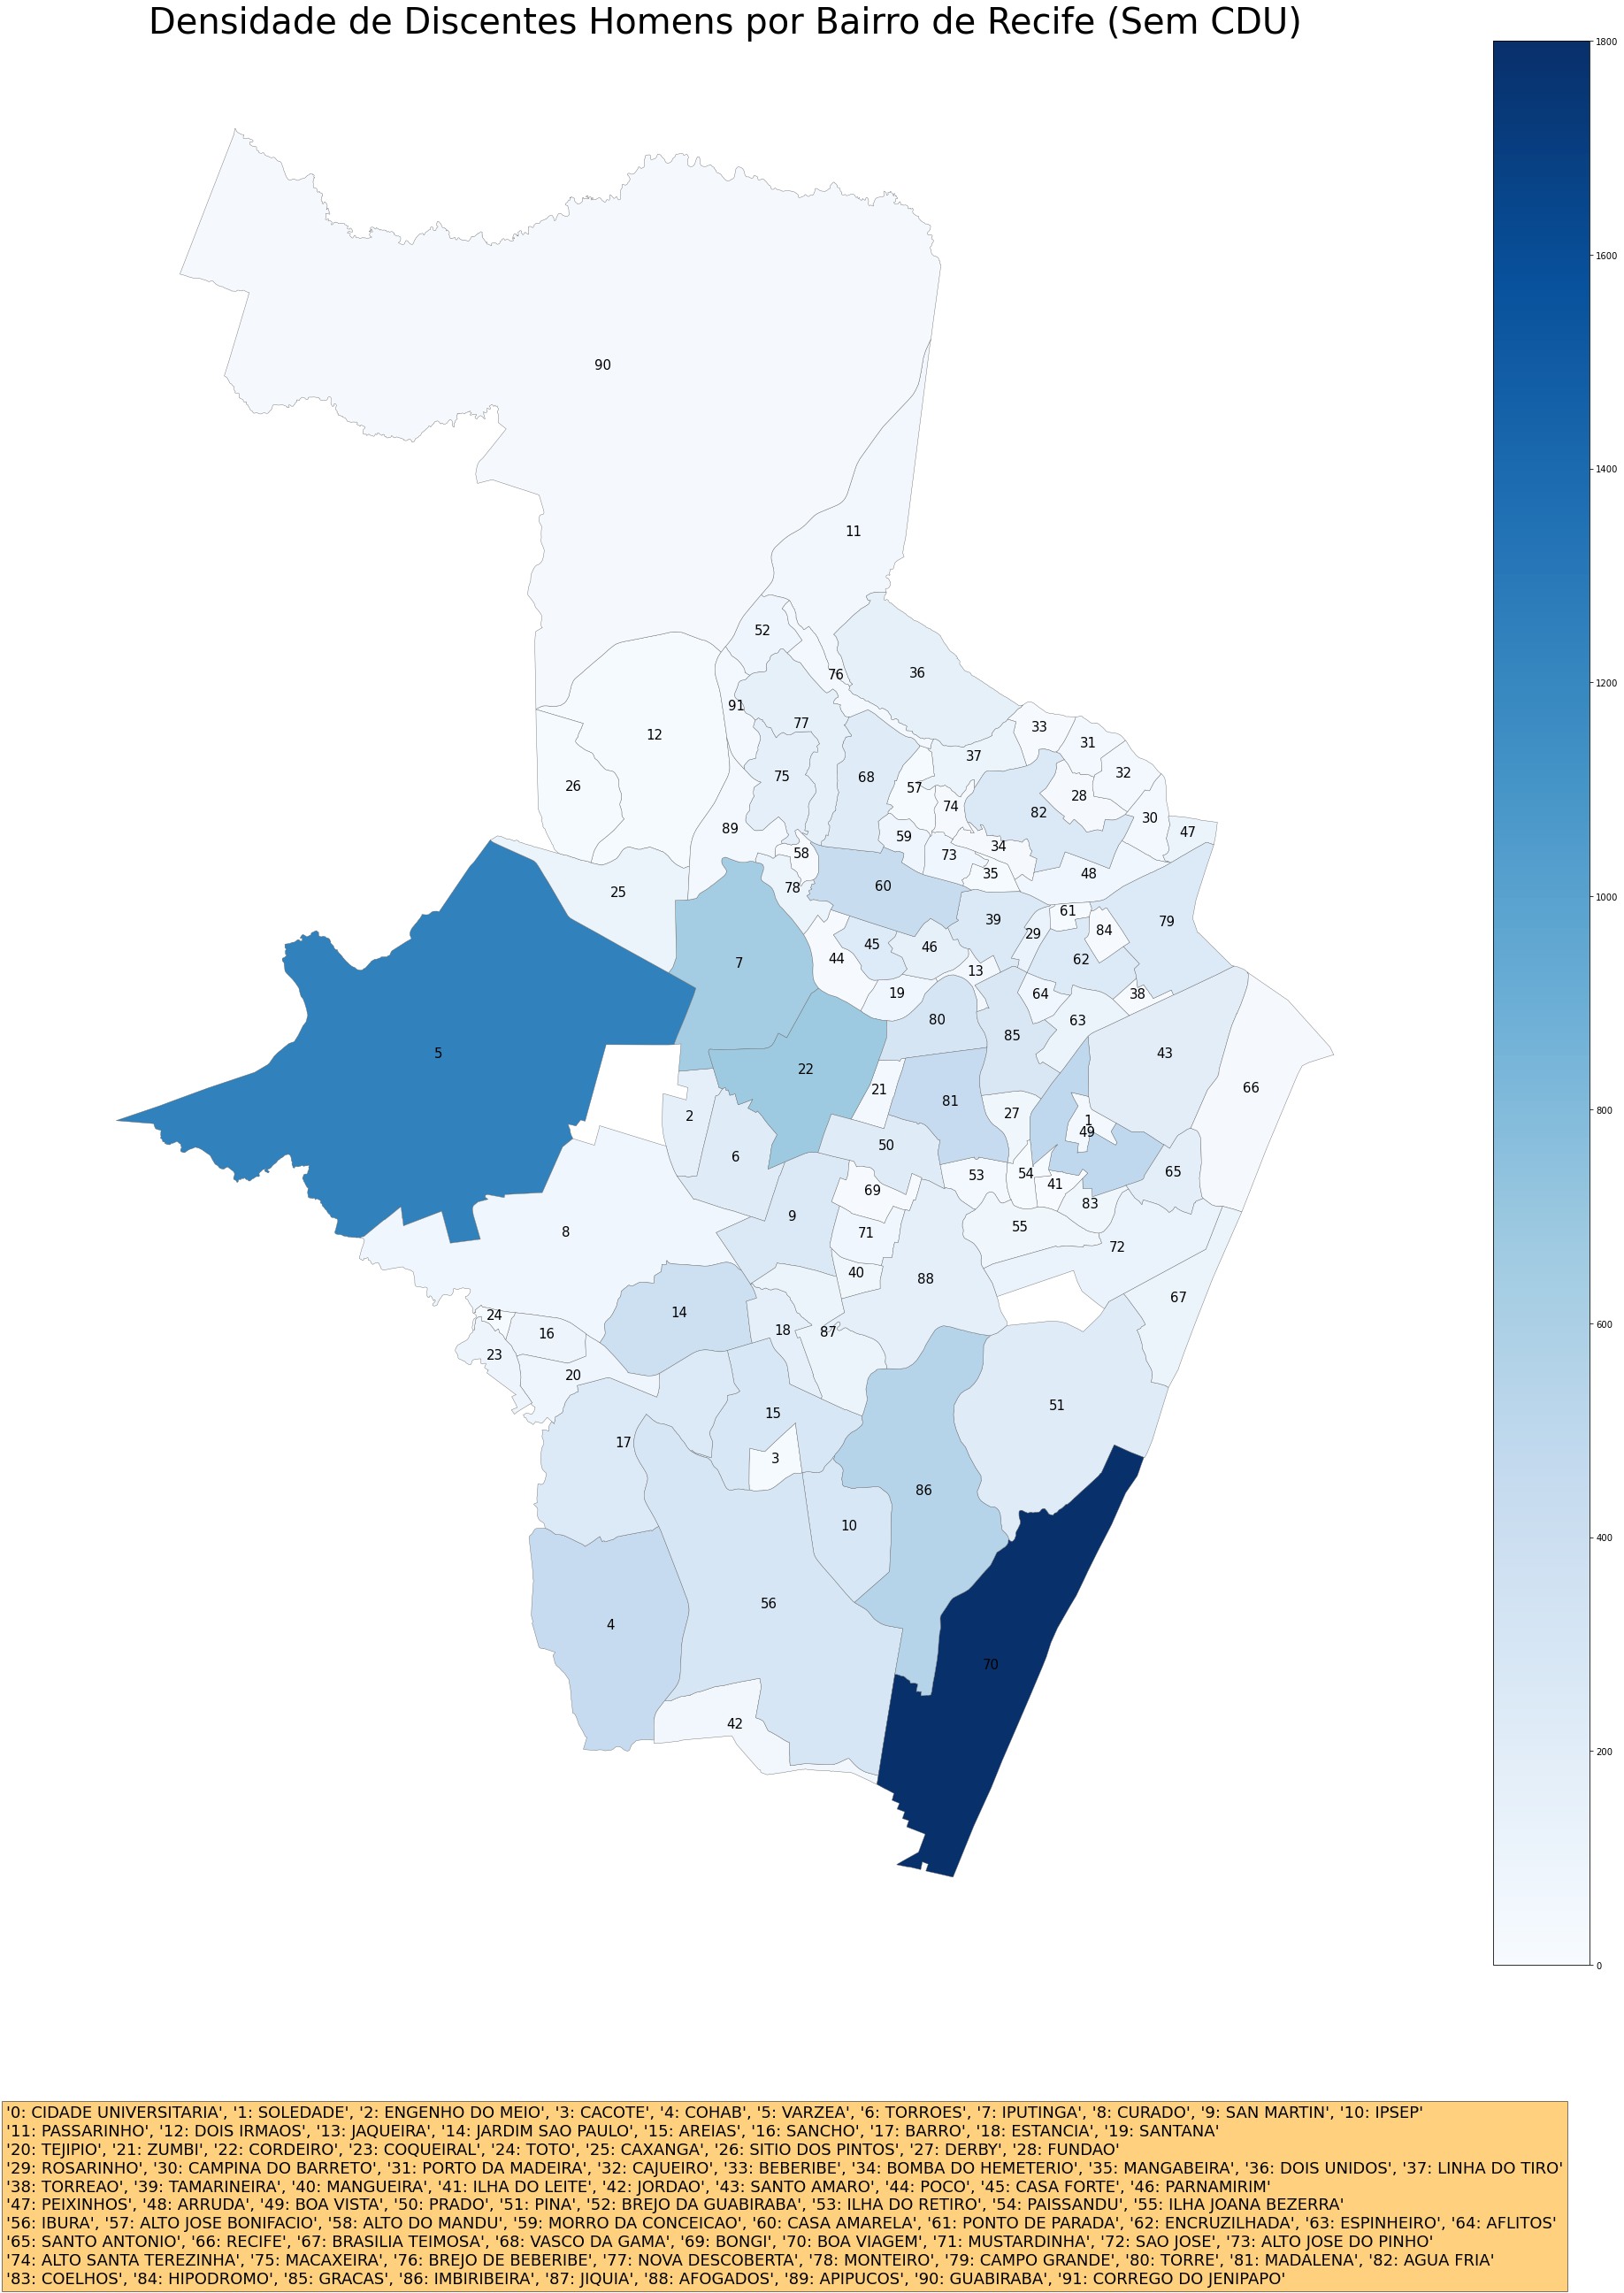

In [178]:
fig3, ax3 = plt.subplots(1, figsize=(40, 40))
plt.xticks(rotation=90)
plt.title(label = "Densidade de Discentes Homens por Bairro de Recife (Sem CDU)",fontsize=40)
plt.figtext(0.2, 0, relacao, ha="left", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
map_and_stats_rec[map_and_stats_rec["bairro_nome_ca"] != "CIDADE UNIVERSITARIA"].plot(column="homens", cmap="Blues", linewidth=0.4, ax=ax3, edgecolor=".4")
map_and_stats_rec[map_and_stats_rec["bairro_nome_ca"] != "CIDADE UNIVERSITARIA"].apply(lambda x: ax3.annotate(text=x['Indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=15), axis=1,)
bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=1800))
bar_info._A = []
cbar = fig3.colorbar(bar_info)
ax3.axis("off")

(-35.02656241739515,
 -34.849511611585676,
 -8.166782392960442,
 -7.915054767400497)

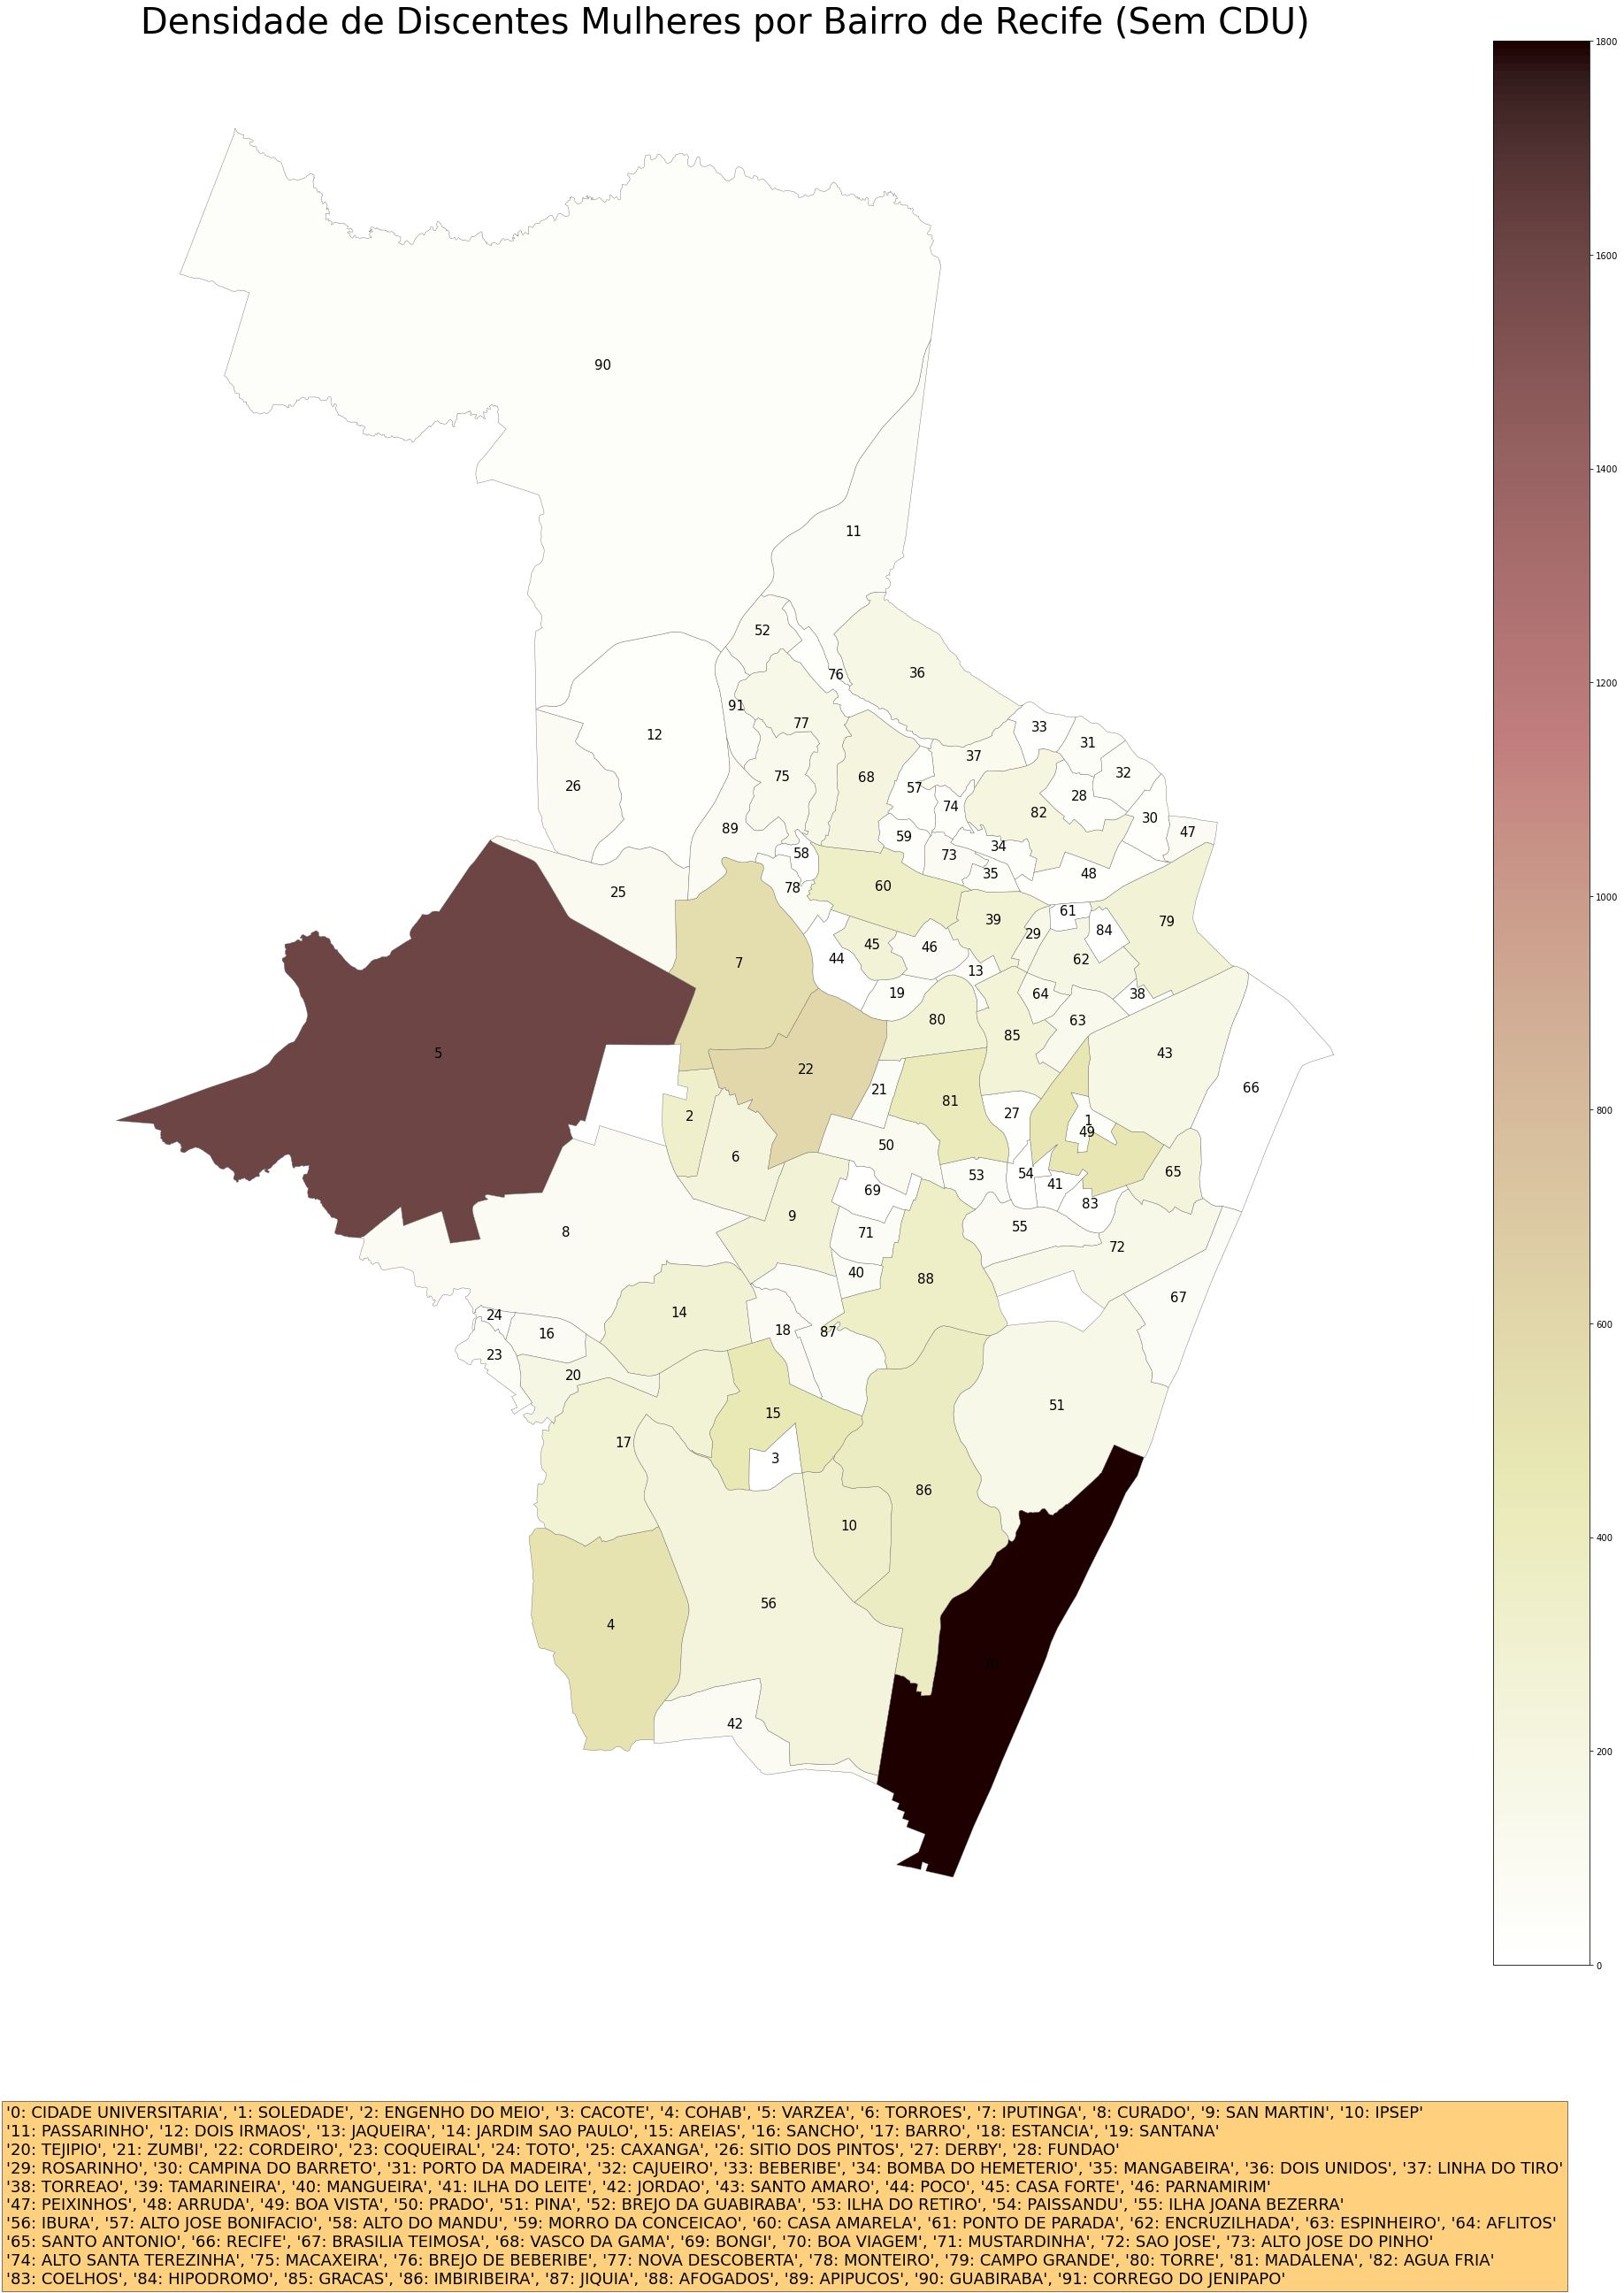

In [179]:
fig4, ax4 = plt.subplots(1, figsize=(40, 40))
plt.xticks(rotation=90)
plt.title(label = "Densidade de Discentes Mulheres por Bairro de Recife (Sem CDU)",fontsize=40)
plt.figtext(0.2, 0, relacao, ha="left", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
map_and_stats_rec[map_and_stats_rec["bairro_nome_ca"] != "CIDADE UNIVERSITARIA"].plot(column="mulheres", cmap="pink_r", linewidth=0.4, ax=ax4, edgecolor=".4")
map_and_stats_rec[map_and_stats_rec["bairro_nome_ca"] != "CIDADE UNIVERSITARIA"].apply(lambda x: ax4.annotate(text=x['Indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=15), axis=1,)
bar_info = plt.cm.ScalarMappable(cmap="pink_r", norm=plt.Normalize(vmin=0, vmax=1800))
bar_info._A = []
cbar = fig4.colorbar(bar_info)
ax4.axis("off")